In [7]:
## Script to convert the file into CSV and load the parquet file
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau

In [2]:
# File Origin
parquet_file_path = '/Users/PS/Library/CloudStorage/GoogleDrive-pascal@ephema.io/Meine Ablage/ephema/Code/ET/MEVBoost Analysis/openethdata_eth_data.parquet.gzip'
# File Stored
csv_file_path = '/Users/PS/Library/CloudStorage/GoogleDrive-pascal@ephema.io/Meine Ablage/ephema/Code/ET/MEVBoost Analysis/MEVBoost_CSV.csv'

# Reading the Parquet file
mev_boost_data = pd.read_parquet(parquet_file_path)

# Ensuring right formatting
mev_boost_data['date'] = pd.to_datetime(mev_boost_data['date'])

## Saving the DataFrame as a CSV file // file 1.2GB as csv so not saving it locally for now
# mev_boost_data.to_csv(csv_file_path, index=False)

# print(f"File converted and saved as {csv_file_path}")

File converted and saved as /Users/PS/Library/CloudStorage/GoogleDrive-pascal@ephema.io/Meine Ablage/ephema/Code/ET/MEVBoost Analysis/MEVBoost_CSV.csv


In [6]:
mev_boost_data.head(2)

,date,slot,block_number,relay,builder_pubkey,proposer_pubkey,mevboost_value,builder,validator
0,2022-09-23 15:07:35,4760136,15596838.0,None,None,0x83e0398c4ae79cfa03405bfd7a34a98f1b88dfed2e4e...,None,None,0x83e0398c4ae79cfa03405bfd7a34a98f1b88dfed2e4e...
1,2023-01-22 02:07:59,5627438,16459258.0,None,None,0xae308047e7289595487c718b7ec58ea96fb4705cc061...,None,None,0xae308047e7289595487c718b7ec58ea96fb4705cc061...


In [28]:
num_rows = len(mev_boost_data)
non_empty_count = mev_boost_data[mev_boost_data['mevboost_value'].notna() & (mev_boost_data['mevboost_value'] != '')].shape[0]
print(f"Number of non-empty entries in 'mevboost_value': {non_empty_count}")
print(f"Number of entries: {num_rows}")

Number of non-empty entries in 'mevboost_value': 3149325
Number of entries: 3583195


In [29]:
sorted_mbd = mev_boost_data.sort_values(by='date')
sorted_mbd.head(3)

,date,slot,block_number,relay,builder_pubkey,proposer_pubkey,mevboost_value,builder,validator
500118,2022-09-15 06:42:59,4700013,15537394.0,None,None,0xa04520c5c37237e358cdd10d75d055d2e81ada151e63...,None,None,celsius
1897668,2022-09-15 06:43:11,4700014,15537395.0,None,None,0xa605e658a0dd0dd77adb9fc2398f78f24c648125126d...,None,None,stakehound
562765,2022-09-15 06:43:23,4700015,15537396.0,None,None,0xb11a32a0f8f7acb81f959e7c68af49705bb64d78b41b...,None,None,lido


In [50]:
# Calculate mean, ignoring NaN values

empty_values_count = mev_boost_data['mevboost_value'].isna().sum()
mean_value = mev_boost_data['mevboost_value'].mean()
mean_value_in_eth = mean_value / (10**18)
# Calculate median, ignoring NaN values
median_value = mev_boost_data['mevboost_value'].median()
median_value_in_eth = median_value / (10**18)

print(f"Empty Values in mevboost_value: {empty_values_count}")
print(f"Mean MEVBoost Payment: {mean_value_in_eth}")
print(f"Median of MEVBoost Payment: {median_value_in_eth}")

Empty Values in mevboost_value: 433870
Mean MEVBoost Payment: 0.13072997068837505
Median of MEVBoost Payment: 0.05167265233559621


In [8]:
mevboost_value = mev_boost_data['mevboost_value']

# Convert decimal.Decimal values to float
mevboost_value = mevboost_value.astype(float)

# Mean
mean_value = mevboost_value.mean()

# Median
median_value = mevboost_value.median()

# Mode (may have multiple modes, hence the Series)
mode_values = mevboost_value.mode()

# Standard Deviation
std_deviation = mevboost_value.std()

# Minimum
min_value = mevboost_value.min()

# Maximum
max_value = mevboost_value.max()

# Range
data_range = max_value - min_value

# Percentiles (e.g., 25th, 50th, and 75th percentiles)
percentiles = mevboost_value.quantile([0.25, 0.5, 0.75])

# Skewness
skewness = mevboost_value.skew()

# Kurtosis
kurtosis = mevboost_value.kurtosis()

# Display the computed statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_values.tolist())  # Convert to list to handle multiple modes
print("Standard Deviation:", std_deviation)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("Range:", data_range)
print("25th, 50th, and 75th Percentiles:", percentiles.tolist())
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 1.307299706883749e+17
Median: 5.167265233559621e+16
Mode: [3.4543546433999996e+16]
Standard Deviation: 1.38121760578771e+18
Minimum: 0.0
Maximum: 6.919631922654178e+20
Range: 6.919631922654178e+20
25th, 50th, and 75th Percentiles: [3.094062329093893e+16, 5.167265233559621e+16, 9.807746968866715e+16]
Skewness: 272.2626572156207
Kurtosis: 105496.22744909406


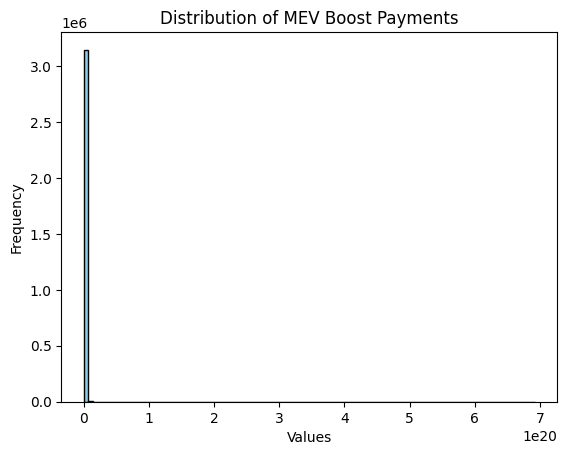

In [30]:
# Plot histogram
plt.hist(mevboost_value, bins=100, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of MEV Boost Payments')

# Show plot
plt.show()

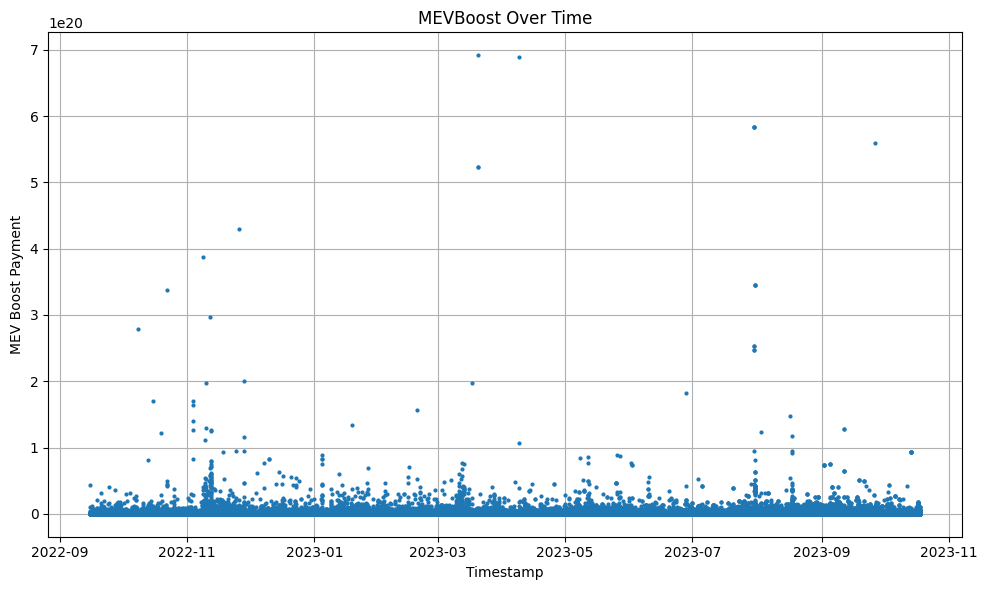

In [22]:
# Downsample the data to reduce the number of points plotted
mev_boost_data_sorted = mev_boost_data.sort_values(by='date')

# Plot the data over time
plt.figure(figsize=(10, 6))
plt.plot(mev_boost_data_sorted['date'], mev_boost_data_sorted['mevboost_value'], marker='o', markersize=2, linestyle='')
plt.xlabel('Timestamp')
plt.ylabel('MEV Boost Payment')
plt.title('MEVBoost Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


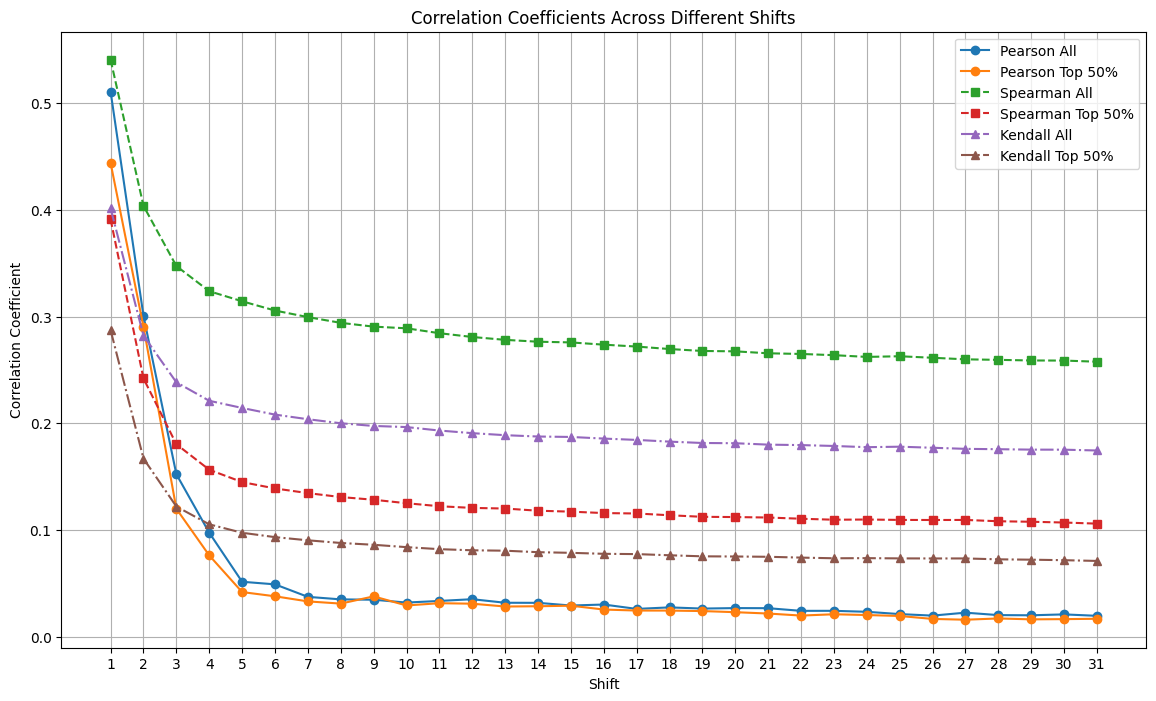

In [11]:
## calculating the correlation between consecutive values to understand if MEV is seasonal

# sorting the data first
mev_boost_data_sorted = mev_boost_data.sort_values(by='date')
mevboost_value = mev_boost_data_sorted['mevboost_value']

# Convert decimal.Decimal values to float
mevboost_value = mevboost_value.astype(float)

# Sanity Check: Only use top 50% data
cutoff = mevboost_value.quantile(0.5)
top_50_p_values = mevboost_value[mevboost_value > cutoff]

# Optimized way to calculate correlations for various shifts, including the top 50%
shifts = range(1, 32)  # Considering shifts for one epoch
results = []  # To store the results for each shift

# Loop through each shift
for shift in shifts:
    shifted_data = mevboost_value.shift(shift)
    shifted_data_50 = top_50_p_values.shift(shift)
    
    # For all data
    concatenated_data = pd.concat([mevboost_value, shifted_data], axis=1).dropna()
    pearson_corr = pearsonr(concatenated_data.iloc[:, 0], concatenated_data.iloc[:, 1])[0]
    spearman_corr = spearmanr(concatenated_data.iloc[:, 0], concatenated_data.iloc[:, 1])[0]
    kendall_corr = kendalltau(concatenated_data.iloc[:, 0], concatenated_data.iloc[:, 1])[0]
    
    # For top 50% data
    concatenated_data_50 = pd.concat([top_50_p_values, shifted_data_50], axis=1).dropna()
    pearson_corr_50 = pearsonr(concatenated_data_50.iloc[:, 0], concatenated_data_50.iloc[:, 1])[0]
    spearman_corr_50 = spearmanr(concatenated_data_50.iloc[:, 0], concatenated_data_50.iloc[:, 1])[0]
    kendall_corr_50 = kendalltau(concatenated_data_50.iloc[:, 0], concatenated_data_50.iloc[:, 1])[0]
    
    # Store the results
    results.append({
        'Shift': shift,
        'Pearson All': pearson_corr,
        'Pearson Top 50%': pearson_corr_50,
        'Spearman All': spearman_corr,
        'Spearman Top 50%': spearman_corr_50,
        'Kendall All': kendall_corr,
        'Kendall Top 50%': kendall_corr_50,
    })

# Convert results to a DataFrame for a neat table
results_df = pd.DataFrame(results)
results_df.set_index('Shift', inplace=True)

## Display the results table
#print(results_df)

# Assuming `results_df` is your DataFrame containing the correlation results
shifts = results_df.index.values

# Plotting
plt.figure(figsize=(14, 8))

# Pearson
plt.plot(shifts, results_df['Pearson All'], marker='o', linestyle='-', label='Pearson All')
plt.plot(shifts, results_df['Pearson Top 50%'], marker='o', linestyle='-', label='Pearson Top 50%')

# Spearman
plt.plot(shifts, results_df['Spearman All'], marker='s', linestyle='--', label='Spearman All')
plt.plot(shifts, results_df['Spearman Top 50%'], marker='s', linestyle='--', label='Spearman Top 50%')

# Kendall
plt.plot(shifts, results_df['Kendall All'], marker='^', linestyle='-.', label='Kendall All')
plt.plot(shifts, results_df['Kendall Top 50%'], marker='^', linestyle='-.', label='Kendall Top 50%')

# Adding legend
plt.legend()

# Titles and labels
plt.title('Correlation Coefficients Across Different Slots')
plt.xlabel('Shift')
plt.ylabel('Correlation Coefficient')
plt.xticks(shifts)  # Ensure we have a tick for every shift value

# Display the plot
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

## TO DO: currently model runs indefintely (either local hardware not strong enough or implementation error)

# To further verify if the data can be predicted we will test to use an ARIMA model

# sorting the data first
mev_boost_data_sorted = mev_boost_data.sort_values(by='date')
mevboost_value = mev_boost_data_sorted['mevboost_value']

# Check for stationarity
result = adfuller(mevboost_value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# If p-value > 0.05, the series is not stationary and you may need to difference it

# Define the ARIMA model
# You'll need to choose p, d, q based on your data
# A common approach is to use pmdarima.auto_arima to find optimal parameters, but let's use placeholders for now
p, d, q = 1, 1, 1  # These are example values
model = ARIMA(mevboost_value, order=(p, d, q))

# Fit the ARIMA model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make forecast
n_periods = 5  # For example, predict the next 5 periods
forecast = model_fit.forecast(steps=n_periods)
print(forecast)


KeyboardInterrupt: 

In [37]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 24.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
